# EDA with Boston Marathon dataset

## 데이터 불러오기

In [ ]:
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/practice_data/marathon_results_2015.csv')
df2 = pd.read_csv('/content/drive/MyDrive/practice_data/marathon_results_2016.csv')
df3 = pd.read_csv('/content/drive/MyDrive/practice_data/marathon_results_2017.csv') # 총 3년 동안의 데이터 전부 불러오기

- 불러온 데이터프레임들의 칼럼 확인

In [ ]:
df1.columns

Index(['Unnamed: 0', 'Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country',
       'Citizen', 'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K',
       '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall',
       'Gender', 'Division'],
      dtype='object')

In [ ]:
df2.columns

Index(['Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country', 'Citizen',
       'Unnamed: 8', '5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K',
       '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall', 'Gender',
       'Division'],
      dtype='object')

In [ ]:
df3.columns

Index(['Unnamed: 0', 'Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country',
       'Citizen', 'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K',
       '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall',
       'Gender', 'Division'],
      dtype='object')

## 데이터 전처리

In [ ]:
df1['Year'] = 2015
df2['Year'] = 2016
df3['Year'] = 2017 # 연도 데이터 보존 위해 새로운 칼럼인 Year 생성

In [ ]:
df = pd.concat([df1, df2, df3], ignore_index=True) # 세 데이터셋을 병합
df

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Year,Unnamed: 8
0,0.0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1,2015,NaN
1,1.0,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2,2015,NaN
2,2.0,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3,2015,NaN
3,3.0,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4,2015,NaN
4,4.0,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5,2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79633,26405.0,25166,"Steinbach, Paula Eyvonne",61,F,Ontario,CA,USA,NaN,MI,...,5:55:18,6:46:57,0:16:24,-,7:09:39,26407,11972,344,2017,NaN
79634,26406.0,25178,"Avelino, Andrew R.",25,M,Fayetteville,NC,USA,NaN,MI,...,5:53:48,6:54:21,0:16:40,-,7:16:59,26408,14436,4774,2017,NaN
79635,26407.0,27086,"Hantel, Johanna",57,F,Malvern,PA,USA,NaN,NaN,...,6:00:33,6:54:38,0:16:47,-,7:19:37,26409,11973,698,2017,NaN
79636,26408.0,25268,"Reilly, Bill",64,M,New York,NY,USA,NaN,MI,...,6:06:07,6:56:08,0:16:49,-,7:20:44,26410,14437,1043,2017,NaN


In [ ]:
df.isnull().sum() # 결측치 확인

Unnamed: 0       26630
Bib                  0
Name                 0
Age                  0
M/F                  0
City                 1
State             8993
Country              0
Citizen          76198
Unnamed: 9       79480
5K                   0
10K                  0
15K                  0
20K                  0
Half                 0
25K                  0
30K                  0
35K                  0
40K                  0
Pace                 0
Proj Time            0
Official Time        0
Overall              0
Gender               0
Division             0
Year                 0
Unnamed: 8       79555
dtype: int64

- 결측치가 많거나, 분석에 의미가 없는 칼럼(예: 참가자 ID, Index 등) 제거

In [ ]:
df.columns

Index(['Unnamed: 0', 'Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country',
       'Citizen', 'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K',
       '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall',
       'Gender', 'Division', 'Year', 'Unnamed: 8'],
      dtype='object')

In [ ]:
df = df.drop(['Bib', 'State', 'Unnamed: 0', 'Citizen', 'Unnamed: 9', 'Proj Time', 'Gender', 'Division', 'Unnamed: 8'], axis=1)
df

,Name,Age,M/F,City,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Year
0,"Desisa, Lelisa",25,M,Ambo,ETH,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,2:09:17,1,2015
1,"Tsegay, Yemane Adhane",30,M,Addis Ababa,ETH,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,2:09:48,2,2015
2,"Chebet, Wilson",29,M,Marakwet,KEN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,2:10:22,3,2015
3,"Kipyego, Bernard",28,M,Eldoret,KEN,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,2:10:47,4,2015
4,"Korir, Wesley",32,M,Kitale,KEN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,2:10:49,5,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79633,"Steinbach, Paula Eyvonne",61,F,Ontario,USA,0:46:44,1:35:41,2:23:35,3:12:44,3:23:31,4:12:06,5:03:08,5:55:18,6:46:57,0:16:24,7:09:39,26407,2017
79634,"Avelino, Andrew R.",25,M,Fayetteville,USA,0:32:03,1:05:33,1:52:17,2:49:41,3:00:26,3:50:19,4:50:01,5:53:48,6:54:21,0:16:40,7:16:59,26408,2017
79635,"Hantel, Johanna",57,F,Malvern,USA,0:53:11,1:43:36,2:32:36,-,3:36:24,4:15:21,5:06:37,6:00:33,6:54:38,0:16:47,7:19:37,26409,2017
79636,"Reilly, Bill",64,M,New York,USA,0:40:34,1:27:19,2:17:17,3:11:40,3:22:30,4:06:10,5:07:09,6:06:07,6:56:08,0:16:49,7:20:44,26410,2017


In [ ]:
df.isnull().sum() # City에 결측치 하나 존재.

Name             0
Age              0
M/F              0
City             0
Country          0
5K               0
10K              0
15K              0
20K              0
Half             0
25K              0
30K              0
35K              0
40K              0
Pace             0
Official Time    0
Overall          0
Year             0
dtype: int64

In [ ]:
df = df.dropna() # 결측치 있는 행을 제거

In [ ]:
df.nunique() # 칼럼별로 몇 가지의 값이 존재하는지 확인

Name             67340
Age                 67
M/F                  2
City              9823
Country            105
5K                1493
10K               2798
15K               4145
20K               5530
Half              5796
25K               6962
30K               8423
35K               9880
40K              11232
Pace               611
Official Time    11711
Overall          26629
Year                 3
dtype: int64

- time 데이터 전처리

In [ ]:
df.columns

Index(['Name', 'Age', 'M/F', 'City', 'Country', '5K', '10K', '15K', '20K',
       'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time', 'Overall',
       'Year'],
      dtype='object')

In [ ]:
time_columns = ['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time'] # 시간 데이터 변환을 수행할 칼럼 지정

In [ ]:
len(df)

79637

In [ ]:
for col in time_columns:
  df = df[~df[col].str.startswith('-')]
  print('{} data left'.format(len(df))) # - 으로 시작하는 시간 데이터는 결측치이므로 제거

79408 data left
79321 data left
79298 data left
79244 data left
79223 data left
79183 data left
79133 data left
79086 data left
79037 data left
79037 data left
79037 data left


In [ ]:
pd.to_timedelta(df['Official Time']).dt.total_seconds() # Python datetime 기능 사용하는 pandas 내 함수로 시간 데이터를 String에서 Python의 timedelta 객체로 변환 (시간 연산의 용이성을 위함)

0         7757.0
1         7788.0
2         7822.0
3         7847.0
4         7849.0
          ...   
79632    25473.0
79633    25779.0
79634    26219.0
79636    26444.0
79637    28694.0
Name: Official Time, Length: 79037, dtype: float64

In [ ]:
for col in time_columns:
  df[col] = pd.to_timedelta(df[col]).dt.total_seconds() / 60 # 모든 시간 데이터에 대해 분 단위로의 변환 수행

In [ ]:
df # 전처리 완료

,Name,Age,M/F,City,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Year
0,"Desisa, Lelisa",25,M,Ambo,ETH,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,122.650000,4.933333,129.283333,1,2015
1,"Tsegay, Yemane Adhane",30,M,Addis Ababa,ETH,14.716667,29.716667,44.966667,60.466667,64.016667,76.116667,91.983333,107.983333,122.700000,4.966667,129.800000,2,2015
2,"Chebet, Wilson",29,M,Marakwet,KEN,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,123.016667,4.983333,130.366667,3,2015
3,"Kipyego, Bernard",28,M,Eldoret,KEN,14.716667,29.733333,45.016667,60.483333,64.033333,76.116667,92.000000,108.050000,123.783333,5.000000,130.783333,4,2015
4,"Korir, Wesley",32,M,Kitale,KEN,14.716667,29.733333,44.966667,60.466667,64.016667,76.116667,92.000000,107.983333,123.450000,5.000000,130.816667,5,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79632,"Quinn, Adam H.",19,M,Belmont,USA,35.233333,70.550000,107.833333,153.966667,162.800000,241.183333,282.983333,333.250000,402.850000,16.200000,424.550000,26406,2017
79633,"Steinbach, Paula Eyvonne",61,F,Ontario,USA,46.733333,95.683333,143.583333,192.733333,203.516667,252.100000,303.133333,355.300000,406.950000,16.400000,429.650000,26407,2017
79634,"Avelino, Andrew R.",25,M,Fayetteville,USA,32.050000,65.550000,112.283333,169.683333,180.433333,230.316667,290.016667,353.800000,414.350000,16.666667,436.983333,26408,2017
79636,"Reilly, Bill",64,M,New York,USA,40.566667,87.316667,137.283333,191.666667,202.500000,246.166667,307.150000,366.116667,416.133333,16.816667,440.733333,26410,2017


## EDA - Table 요약

In [ ]:
df.describe() # 데이터의 요약 통계량 확인

,Age,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Year
count,79037.000000,79037.000000,79037.000000,79037.000000,79037.000000,79037.000000,79037.000000,79037.000000,79037.000000,79037.000000,79037.000000,79037.000000,79037.000000,79037.000000
mean,42.413174,25.454200,50.915956,76.807852,103.523082,109.282355,130.913370,159.848876,190.079488,220.084869,8.896045,233.027954,13248.390564,2015.999507
std,11.353358,3.967693,7.990117,12.254233,16.967856,17.938290,22.126903,27.790046,33.698620,39.244810,1.580793,41.445500,7659.726004,0.815460
min,18.000000,14.716667,29.716667,44.950000,60.466667,64.016667,76.083333,91.983333,107.983333,122.650000,4.933333,129.283333,1.000000,2015.000000
25%,34.000000,22.583333,45.166667,68.050000,91.550000,96.650000,115.433333,140.466667,166.566667,192.800000,7.800000,204.216667,6615.000000,2015.000000
50%,42.000000,24.950000,49.850000,75.116667,101.033333,106.616667,127.450000,155.383333,184.566667,213.750000,8.650000,226.416667,13237.000000,2016.000000
75%,50.000000,27.566667,55.183333,83.250000,112.166667,118.400000,142.050000,174.033333,207.616667,241.016667,9.750000,255.216667,19875.000000,2017.000000
max,84.000000,55.833333,107.266667,161.750000,217.116667,228.350000,276.100000,343.733333,411.516667,479.200000,19.283333,505.150000,26628.000000,2017.000000


In [ ]:
df.groupby('Age').mean() # 참가자 나이에 따른 데이터 평균값 확인

<ipython-input-26-3850c40d554e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Age').mean() # 참가자 나이에 따른 데이터 평균값 확인


,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Year
Age,,,,,,,,,,,,,
18,28.243169,55.971038,83.987158,113.115301,119.275410,142.736339,174.759290,207.411202,240.711475,9.715027,254.485792,17145.081967,2016.016393
19,25.750245,51.328186,77.585662,104.808456,110.631005,133.311887,163.338113,195.506495,227.598529,9.189583,240.718015,13861.639706,2015.933824
20,25.119221,50.030715,75.428736,101.906705,107.570115,129.849234,158.712899,188.691124,218.536782,8.818774,231.003001,12582.406130,2015.957854
21,25.240152,50.333574,75.830441,102.318147,108.007920,129.612741,158.559091,189.095386,220.012225,8.887397,232.805510,12949.677686,2015.931818
22,25.644452,51.029064,76.863121,103.663000,109.406295,131.326170,160.311312,190.612880,220.938784,8.921901,233.715219,13106.972504,2015.930535
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,30.409722,62.001389,94.265278,128.202778,135.337500,162.473611,199.109722,238.930556,279.961111,11.325000,296.776389,23440.500000,2015.833333
81,31.693333,64.330000,97.380000,131.313333,138.816667,167.563333,206.080000,251.610000,293.883333,11.936667,312.760000,24477.200000,2016.000000
82,33.837500,68.383333,104.479167,142.379167,150.758333,180.920833,221.645833,263.508333,304.616667,12.316667,322.620833,25054.250000,2015.000000


In [ ]:
df.groupby('Age').mean().sort_values('Official Time')

<ipython-input-27-5fca63f2e576>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Age').mean().sort_values('Official Time')


,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Year
Age,,,,,,,,,,,,,
35,24.491464,48.945320,73.778516,99.386943,104.919755,125.608095,153.201114,181.989243,210.602597,8.511328,222.939294,10978.871528,2016.023003
34,24.541461,48.952464,73.724050,99.285549,104.787564,125.451509,153.053343,181.918395,210.718873,8.514460,223.018052,10994.503725,2015.970774
36,24.624819,49.171154,74.096565,99.748202,105.282304,126.026310,153.706916,182.565560,211.272330,8.536661,223.605563,11197.830798,2016.001844
32,24.594451,49.145241,74.031266,99.704389,105.237361,126.020265,153.742891,182.722996,211.508660,8.543144,223.773464,11032.488590,2015.984201
37,24.708925,49.299392,74.273409,99.991211,105.537676,126.254679,153.915843,182.726328,211.419322,8.543170,223.776208,11285.690019,2015.970250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,32.076316,65.314035,100.352632,136.051754,143.772807,172.666667,211.779825,251.375439,289.220175,11.676316,305.921930,23538.263158,2015.842105
83,31.644444,64.183333,97.516667,132.755556,140.466667,169.227778,208.455556,249.272222,289.300000,11.722222,307.072222,24211.333333,2016.333333
81,31.693333,64.330000,97.380000,131.313333,138.816667,167.563333,206.080000,251.610000,293.883333,11.936667,312.760000,24477.200000,2016.000000


- 나이에 따른 마라톤 기록을 살펴봤을 때, 주로 30대가 좋은 기록을 보임

In [ ]:
df.groupby('City').mean().sort_values('Official Time')

<ipython-input-28-9ee3b863dd69>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('City').mean().sort_values('Official Time')


,Age,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Year
City,,,,,,,,,,,,,,
Keringet,24.0,15.416667,30.466667,45.733333,61.250000,64.583333,76.983333,93.016667,108.316667,122.883333,4.950000,129.616667,1.0,2017.0
Machida-City,25.0,15.416667,30.483333,45.733333,61.266667,64.600000,77.000000,93.016667,108.516667,123.633333,4.983333,130.466667,3.0,2017.0
Koibatek,30.0,14.733333,29.750000,44.983333,60.483333,64.033333,76.116667,92.000000,107.983333,123.300000,5.000000,130.866667,6.0,2015.0
Ambo,25.5,15.250000,30.533333,46.041667,61.858333,65.400000,77.683333,93.141667,109.191667,124.316667,5.016667,131.408333,1.5,2015.5
Lutsk,33.0,15.233333,30.566667,46.083333,61.716667,65.116667,77.300000,93.183333,109.716667,126.266667,5.116667,133.866667,10.0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Redfern, Nsw",56.0,29.633333,59.866667,93.350000,125.966667,134.600000,171.483333,236.633333,302.816667,367.600000,15.150000,397.066667,26587.0,2015.0
South Miami,32.0,20.916667,42.183333,65.516667,92.583333,98.716667,123.566667,167.183333,345.850000,387.366667,15.533333,407.233333,26402.0,2017.0
Cardston,30.0,23.166667,47.333333,75.816667,117.633333,130.350000,181.966667,269.683333,328.500000,387.466667,15.733333,412.166667,26404.0,2017.0


In [ ]:
df.groupby('Country').mean().sort_values('Official Time')

<ipython-input-29-c7efc51ab462>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Country').mean().sort_values('Official Time')


,Age,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Year
Country,,,,,,,,,,,,,,
ZIM,33.500000,15.608333,31.283333,47.150000,63.350000,66.908333,79.591667,95.900000,113.541667,131.066667,5.350000,139.850000,12.500000,2016.500000
KEN,29.800000,16.514000,32.922667,49.362667,65.935333,69.567333,82.558000,99.322000,116.686667,134.168000,5.436667,142.316000,60.440000,2015.960000
BRN,27.000000,17.750000,34.966667,51.916667,68.833333,72.550000,85.833333,102.666667,119.250000,135.700000,5.450000,142.850000,24.000000,2017.000000
ETH,26.884615,16.933333,33.703846,50.462179,67.400641,71.102564,84.487179,102.112179,120.589744,138.460256,5.600000,146.592308,64.730769,2015.923077
BLR,27.000000,17.150000,34.383333,51.816667,69.016667,72.766667,86.150000,104.250000,123.100000,141.366667,5.700000,149.383333,78.000000,2015.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BAH,41.000000,26.900000,53.550000,83.008333,112.791667,120.600000,144.725000,178.750000,215.683333,247.866667,10.000000,262.041667,20945.500000,2015.000000
NGR,44.000000,32.016667,63.550000,94.816667,126.666667,133.600000,158.583333,192.216667,223.483333,253.166667,10.150000,265.766667,20419.000000,2017.000000
AHO,57.000000,24.533333,46.583333,71.000000,97.783333,103.966667,127.900000,162.633333,202.750000,248.333333,10.183333,266.933333,22656.000000,2015.000000


- 하위권 도시 또는 국가와 상위권 도시 또는 국가 간의 차이가 존재

In [ ]:
df.groupby('Country').median() # 중앙값도 확인 가능

<ipython-input-30-1051f4b7e1f2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Country').median() # 중앙값도 확인 가능


,Age,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Year
Country,,,,,,,,,,,,,,
AHO,57.0,24.533333,46.583333,71.000000,97.783333,103.966667,127.900000,162.633333,202.750000,248.333333,10.183333,266.933333,22656.0,2015.0
ALB,48.0,23.750000,47.550000,71.750000,96.683333,102.216667,122.583333,150.616667,181.100000,212.166667,8.616667,225.883333,12627.0,2016.0
ALG,54.5,25.316667,48.675000,72.625000,97.208333,102.600000,123.983333,151.491667,180.750000,210.858333,8.533333,223.375000,10845.0,2017.0
AND,48.0,22.666667,45.683333,69.683333,94.633333,99.883333,119.816667,146.733333,176.200000,203.316667,8.216667,215.366667,10229.0,2016.0
ARG,46.0,24.033333,48.100000,72.466667,97.616667,103.250000,123.033333,149.316667,178.516667,209.650000,8.466667,221.616667,10857.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USA,41.0,25.083333,50.133333,75.516667,101.583333,107.200000,128.100000,156.133333,185.483333,214.716667,8.683333,227.466667,13588.0,2016.0
VEN,45.5,23.216667,46.233333,69.066667,92.550000,97.700000,116.041667,140.416667,165.675000,190.600000,7.716667,202.033333,6466.5,2015.0
VGB,36.5,23.458333,46.750000,70.108333,93.991667,99.150000,118.133333,143.466667,169.991667,196.141667,7.941667,207.916667,8196.5,2015.5


In [ ]:
df[['Age', 'M/F', 'City', 'Country']].mode() # 데이터 칼럼별 최빈값 확인

,Age,M/F,City,Country
0,45,M,Boston,USA


- 45세 보스턴 출신 남성이 가장 많음

In [ ]:
top20_countries = df['Country'].value_counts()[:20].index
top20_countries

Index(['USA', 'CAN', 'GBR', 'MEX', 'GER', 'JPN', 'AUS', 'ITA', 'CHN', 'BRA',
       'FRA', 'ESP', 'KOR', 'HKG', 'IRL', 'NED', 'SUI', 'SWE', 'COL', 'CHI'],
      dtype='object')

In [ ]:
top20_countries_mean = df.groupby('Country').mean().sort_values('Official Time').loc[top20_countries]
top20_countries_mean

<ipython-input-34-4f6db61de095>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top20_countries_mean = df.groupby('Country').mean().sort_values('Official Time').loc[top20_countries]


,Age,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Year
USA,41.577116,25.619757,51.234767,77.275720,104.147201,109.935493,131.706285,160.805532,191.202835,221.386049,8.947307,234.372163,13495.908830,2015.987547
CAN,46.318826,24.689837,49.434105,74.566262,100.368661,105.941826,126.647691,154.324602,183.098452,211.663366,8.556965,224.136938,11912.053464,2015.950122
GBR,43.760113,24.084697,48.309031,73.104202,98.692317,104.219128,124.924271,152.626983,181.628771,210.671794,8.525823,223.314566,11197.667921,2016.139229
MEX,42.862616,24.097512,48.146081,72.584941,97.796301,103.269199,123.699516,151.090555,179.990995,208.628974,8.445641,221.227389,10816.610304,2016.077939
GER,47.783831,26.416257,52.891652,79.811306,107.483978,113.454364,135.809315,165.903281,197.504218,228.853720,9.258875,242.535237,15003.205624,2016.087873
JPN,53.260246,26.335383,52.788422,79.813661,108.011851,114.104781,137.143408,168.462124,201.250990,233.649078,9.459085,247.785383,15581.342213,2016.071721
AUS,44.944563,24.550462,49.141649,74.139872,99.987171,105.568515,126.537313,154.722530,184.434826,213.810981,8.652274,226.646375,11937.447761,2016.119403
ITA,49.163090,25.765021,51.425143,77.520315,104.507868,110.345279,132.274571,161.825036,192.881617,223.538197,9.040701,236.818169,14019.566524,2016.027897
CHN,45.501171,25.721858,51.924083,79.111319,107.746253,113.989149,137.453357,169.332475,202.675566,235.018189,9.499883,248.859368,15448.372365,2016.414520
BRA,44.047059,24.175686,48.313922,72.732941,97.831294,103.266353,123.536549,150.784824,179.419137,207.892471,8.414863,220.410510,10544.070588,2016.247059


- 국가 별로 기록에 차이가 있는 것처럼 보였지만, 참가자 수 기준 상위 20개국 기준으로 살펴봤을 때 기록에 큰 차이가 없음
- 작은 표본에서 몇몇 outlier들이 대표값에 영향을 미쳐 차이가 발생한 것처럼 보였던 것

## EDA - Graphic 시각화

<ipython-input-35-5b3a8e7932cb>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Official Time']) # 분포표 시각화


<Axes: ylabel='Density'>

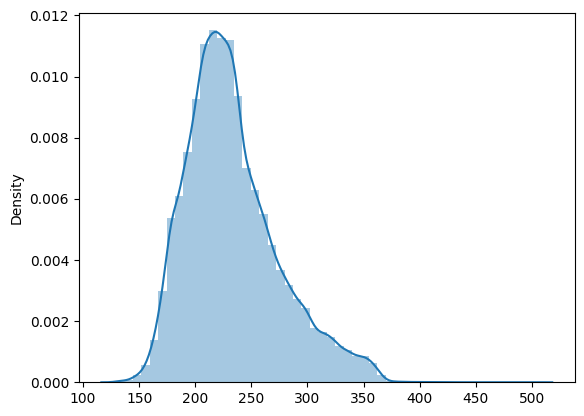

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(x=df['Official Time']) # 분포표 시각화

<Axes: xlabel='M/F', ylabel='Official Time'>

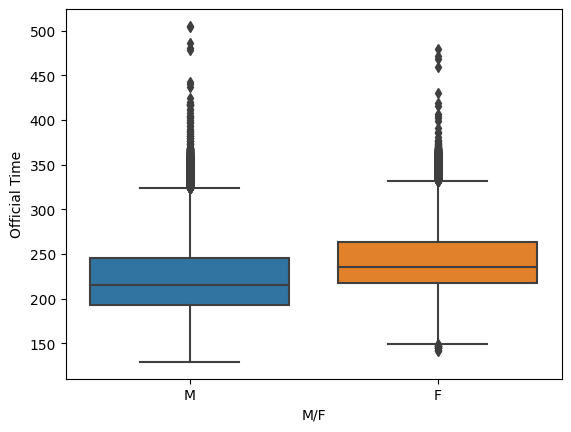

In [ ]:
sns.boxplot(x='M/F', y='Official Time', data=df) # boxplot 시각화

<Axes: ylabel='Official Time'>

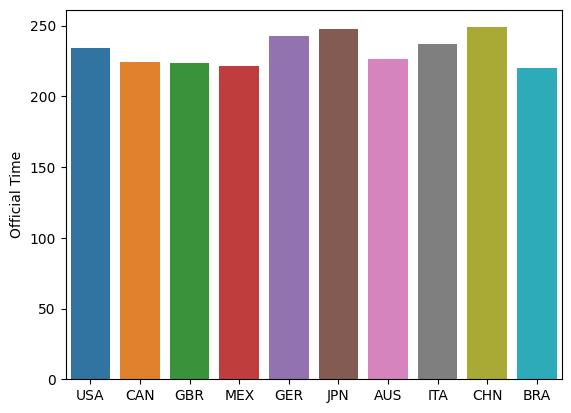

In [ ]:
sns.barplot(x=top20_countries[:10], y='Official Time', data=top20_countries_mean[:10]) # barplot 시각화

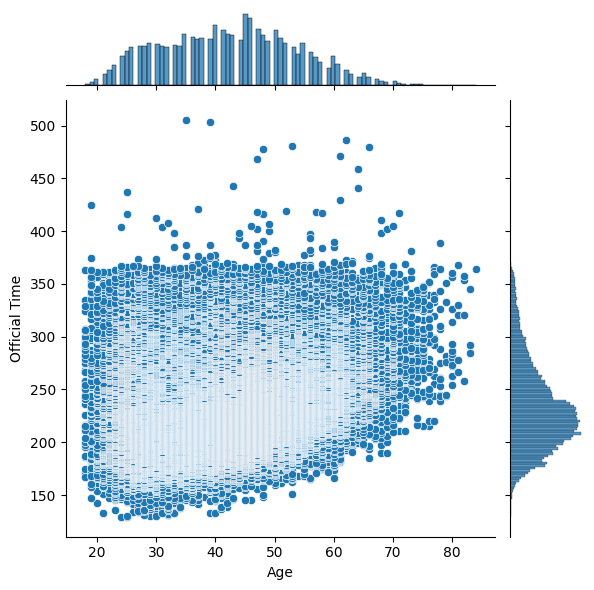

In [ ]:
sns.jointplot(x='Age', y='Official Time', data=df) # scatterplot, density 시각화

- 성별, 국가, 연령이 마라톤 기록에 큰 영향이 없는 것처럼 보임

In [ ]:
df[df['Official Time'] < df['Official Time'].quantile(0.1)]

,Name,Age,M/F,City,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Year
0,"Desisa, Lelisa",25,M,Ambo,ETH,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,122.650000,4.933333,129.283333,1,2015
1,"Tsegay, Yemane Adhane",30,M,Addis Ababa,ETH,14.716667,29.716667,44.966667,60.466667,64.016667,76.116667,91.983333,107.983333,122.700000,4.966667,129.800000,2,2015
2,"Chebet, Wilson",29,M,Marakwet,KEN,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,123.016667,4.983333,130.366667,3,2015
3,"Kipyego, Bernard",28,M,Eldoret,KEN,14.716667,29.733333,45.016667,60.483333,64.033333,76.116667,92.000000,108.050000,123.783333,5.000000,130.783333,4,2015
4,"Korir, Wesley",32,M,Kitale,KEN,14.716667,29.733333,44.966667,60.466667,64.016667,76.116667,92.000000,107.983333,123.450000,5.000000,130.816667,5,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55308,"Keating, Conor",20,M,Annapolis,USA,21.283333,41.933333,62.816667,84.066667,88.750000,105.683333,128.133333,151.650000,175.533333,7.083333,185.400000,2081,2017
55309,"Alderfer, Hannah E",26,F,Dover,USA,21.283333,42.633333,63.950000,85.533333,90.166667,106.933333,129.066667,152.466667,175.450000,7.083333,185.400000,2082,2017
55310,"Hoffmann, Matthias",31,M,Hong Kong,HKG,18.833333,37.633333,56.950000,77.816667,82.083333,98.616667,121.466667,146.966667,173.883333,7.083333,185.400000,2083,2017
55311,"Mulvey, Brendan C.",30,M,Brighton,USA,22.866667,44.216667,65.766667,87.333333,91.950000,108.816667,130.800000,153.200000,175.316667,7.083333,185.416667,2084,2017


<Axes: xlabel='Age', ylabel='Official Time'>

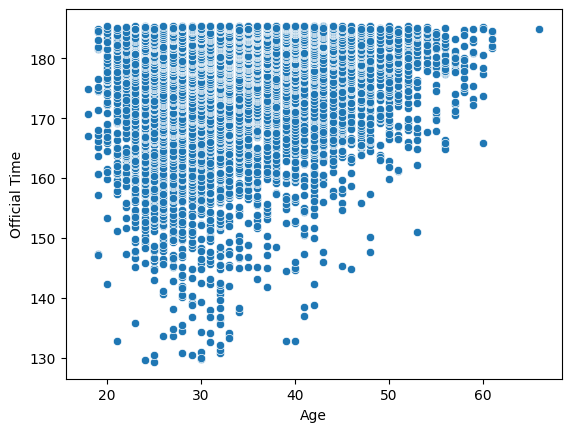

In [ ]:
sns.scatterplot(x='Age', y='Official Time', data=df[df['Official Time'] < df['Official Time'].quantile(0.1)])

마라톤 기록 상위 10퍼센트에 대해 연령과 기록의 관계 살펴보니, 연령이 높을수록 매우 좋은 기록을 얻기에는 어려운 것으로 보임

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

df[['M/F2']] = OrdinalEncoder().fit_transform(df[['M/F']])
df[['City2']] = OrdinalEncoder().fit_transform(df[['City']])
df[['Country2']] = OrdinalEncoder().fit_transform(df[['Country']]) # categorical variable을 임의로 인코딩. 인코딩과 관련된 자세한 사항은 추후 예측분석에서 다룰 예정.

In [ ]:
df.columns

Index(['Name', 'Age', 'M/F', 'City', 'Country', '5K', '10K', '15K', '20K',
       'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time', 'Overall',
       'Year', 'M/F2', 'City2', 'Country2'],
      dtype='object')

<Axes: >

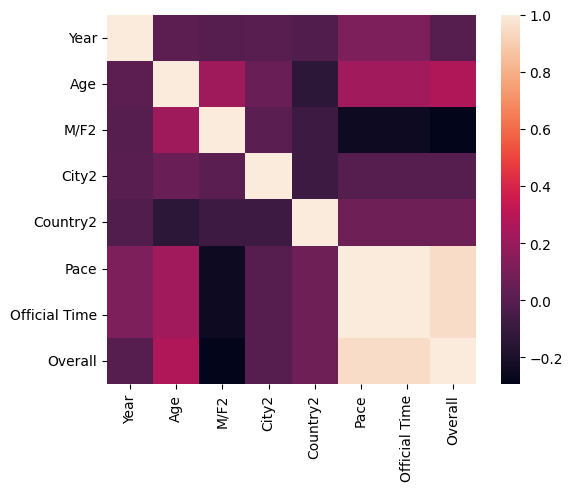

In [ ]:
corr = df[['Year', 'Age', 'M/F2', 'City2', 'Country2', 'Pace', 'Official Time', 'Overall']].corr() # 변수 간의 상관관계 분석 및 시각화
sns.heatmap(corr, vmax=1, square=True)

- correlation 1인 변수들은 서로 거의 같은 데이터이므로, 하나만 사용하면 됨
- target 변수인 Official Time과 correlation 값이 0에 가까울수록 상관성이 떨어져 중요도가 낮은 변수일 가능성이 높음
- City, Country는 마라톤 기록과 낮은 상관관계를 가짐